In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:

from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
train_data=datasets.MNIST(
    root = "data",
    train=True,
    transform = ToTensor(),
    download= True

)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16143318.08it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 476499.46it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4361417.75it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4413931.60it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data=datasets.MNIST(
    root = "data",
    train=False,
    transform = ToTensor(),
    download= True

)

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [12]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [14]:
from torch.utils.data import DataLoader
loaders ={
    "train":DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
    "test":DataLoader(test_data,
                      batch_size=100,
                      shuffle=True,
                      num_workers=1)
}


In [15]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7bada6df3730>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7bada6df3580>}

In [17]:
# most important we want to find a particular deeep learning model!
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
      super(CNN,self).__init__()

      self.conv1=nn.Conv2d(1,10,kernel_size=5)
      self.conv2=nn.Conv2d(10,20,kernel_size=5)
      self.conv2_drop=nn.Dropout2d()
      self.fc1=nn.Linear(320,50)
      self.fc2=nn.Linear(50,10)

    def forward(self,x):
      x=F.relu(F.max_pool2d(self.conv1(x),2))
      x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
      x=x.view(-1,320) # it is to show flateen of daya so we use view
      x=F.relu(self.fc1(x))
      x=F.dropout(x,training=self.training)
      x=self.fc2(x)

      return F.softmax(x)







In [22]:
import torch
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CNN().to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()
def train(epoch):
  model.train()
  for batch_idx,(data,target) in enumerate(loaders["train"]):
    data,target=data.to(device),target.to(device)
    optimizer.zero_grad()
    output=model(data)
    loss=loss_fn(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\tLoss: {loss.item():.6f}")

def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad(): # Use the correct torch.no_grad() function
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(loaders['test'].dataset),
      100. * correct / len(loaders['test'].dataset)))

In [23]:
for epoch in range(1,10):
  train(epoch)
  test()

<ipython-input-17-34d9fef67d6e>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301939
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.280079
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.138229
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.908129
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.905544
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.841179
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.789033
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.853426
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.804841
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.701788
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.703723
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.732982
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.686454
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.733663
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.677666
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.666697
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.651044
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.714327
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.581550
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.659911
Train Epoch

In [24]:
device

device(type='cuda')

Predicted: 9


<ipython-input-17-34d9fef67d6e>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


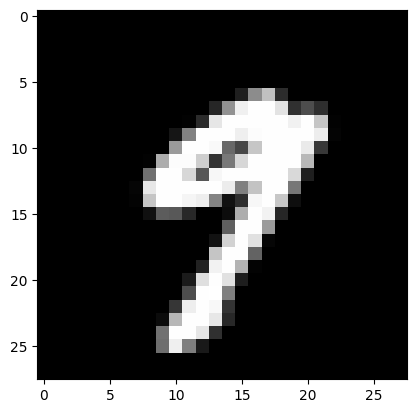

In [29]:
import matplotlib.pyplot as plt
model.eval()
data,target = test_data[20]
data=data.unsqueeze(0).to(device)
output=model(data)
# Use .item() to get the value of a single-element tensor
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Predicted: {prediction}")
image=data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap="gray")
plt.show()